In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [3]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

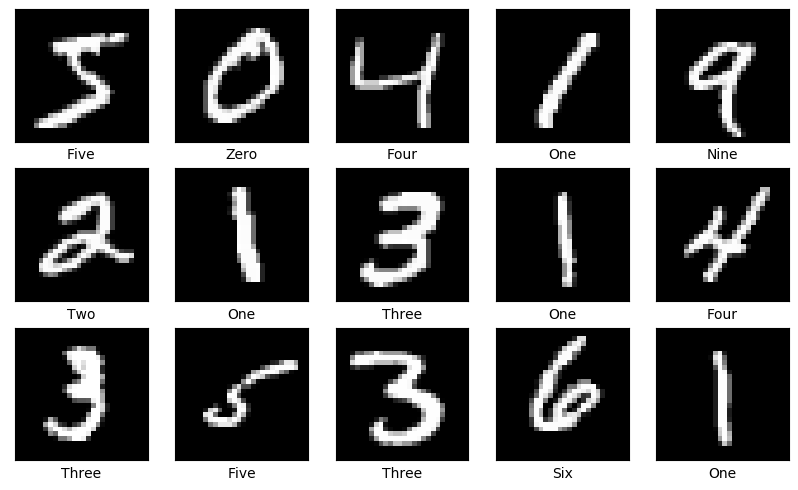

In [5]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [6]:
X_train_digit.shape

(60000, 28, 28)

In [7]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [8]:
#recheck input dimensionality
X_train_digit.shape

(60000, 784)

In [9]:
#output shape check
y_test_digit.shape

(10000,)

In [10]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [11]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [13]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [15]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 12s 18ms/step - loss: 1.3801 - accuracy: 0.8254 - val_loss: 0.3995 - val_accuracy: 0.9001
Epoch 2/10
600/600 [==============================] - 8s 14ms/step - loss: 0.2895 - accuracy: 0.9240 - val_loss: 0.2507 - val_accuracy: 0.9367
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2025 - accuracy: 0.9457 - val_loss: 0.2299 - val_accuracy: 0.9457
Epoch 4/10
600/600 [==============================] - 7s 12ms/step - loss: 0.1682 - accuracy: 0.9541 - val_loss: 0.2081 - val_accuracy: 0.9508
Epoch 5/10
600/600 [==============================] - 9s 15ms/step - loss: 0.1479 - accuracy: 0.9598 - val_loss: 0.1622 - val_accuracy: 0.9587
Epoch 6/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1282 - accuracy: 0.9661 - val_loss: 0.1699 - val_accuracy: 0.9605
Epoch 7/10
600/600 [==============================] - 9s 15ms/step - loss: 0.1226 - accuracy: 0.9668 - val_loss: 0.1543 - val_accuracy: 0.96

In [16]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


In [17]:
y_predict[0]

array([6.8303823e-01, 9.9998832e-01, 9.9999595e-01, 9.9999976e-01,
       9.9991381e-01, 8.0156326e-04, 2.1470218e-08, 1.0000000e+00,
       9.9871612e-01, 1.0000000e+00], dtype=float32)

In [18]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector


In [19]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [21]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

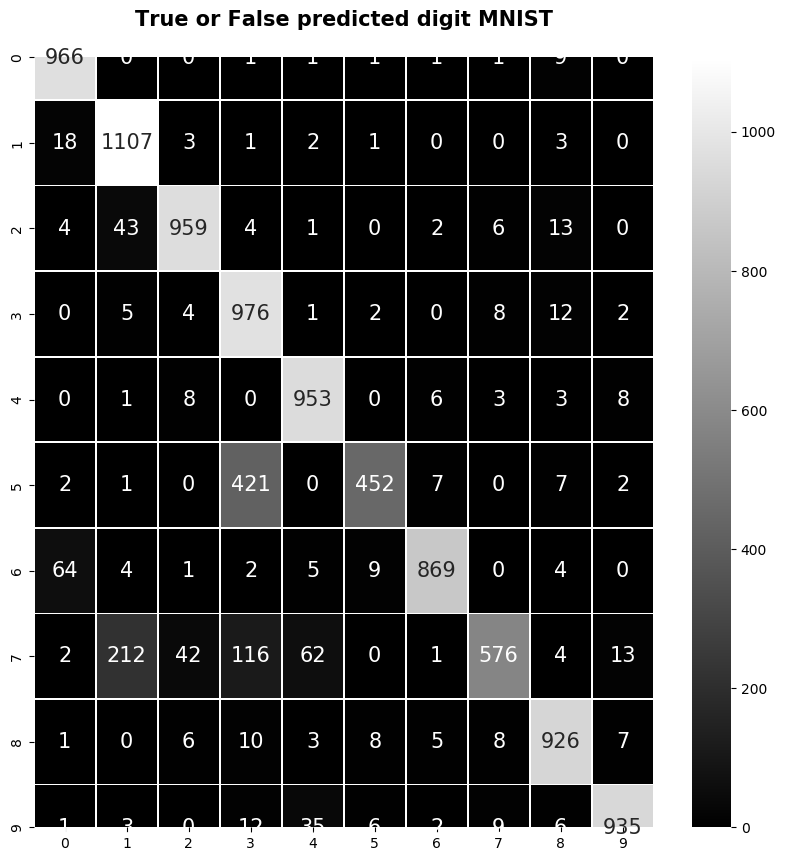

In [22]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       980
           1       0.80      0.98      0.88      1135
           2       0.94      0.93      0.93      1032
           3       0.63      0.97      0.76      1010
           4       0.90      0.97      0.93       982
           5       0.94      0.51      0.66       892
           6       0.97      0.91      0.94       958
           7       0.94      0.56      0.70      1028
           8       0.94      0.95      0.94       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.87      0.87     10000



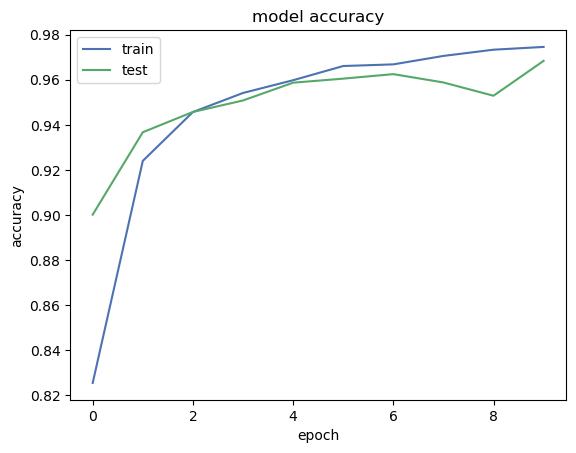

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


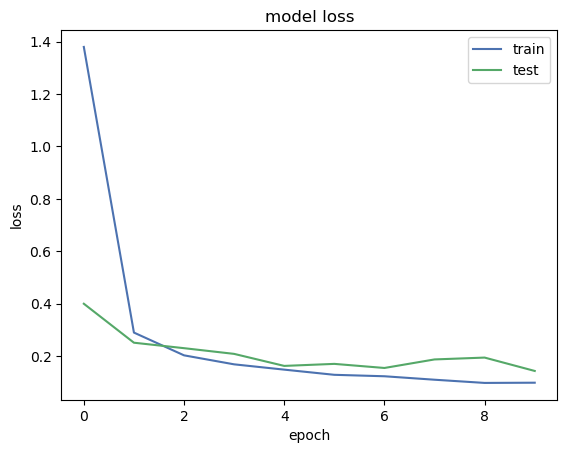

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [26]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

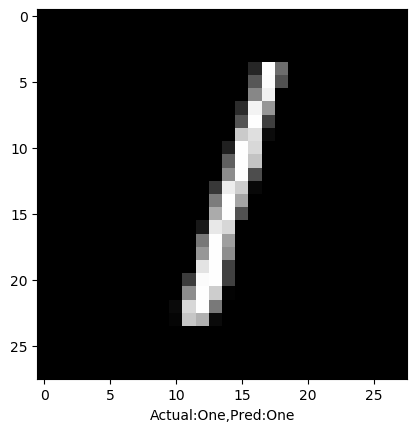

In [27]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()